In [1]:
import wishbone

# Plotting and miscellaneous imports
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn
import seaborn as sns

%matplotlib inline

/homes/lamha/bin/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
scdata = wishbone.wb.SCData.from_csv(os.path.expanduser('wishbone/only_genes_CD4tcells_tpm.csv'), 
                data_type='sc-seq', normalize=False)

In [3]:
scdata

SCData: 408 cells x 20037 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=True
metadata=True
normalized=True
pca=None
tsne=None

In [4]:
scdata.cluster_assignments

In [5]:
scdata.run_pca()

In [6]:
scdata

SCData: 408 cells x 20037 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=True
metadata=True
normalized=True
pca=True
tsne=None

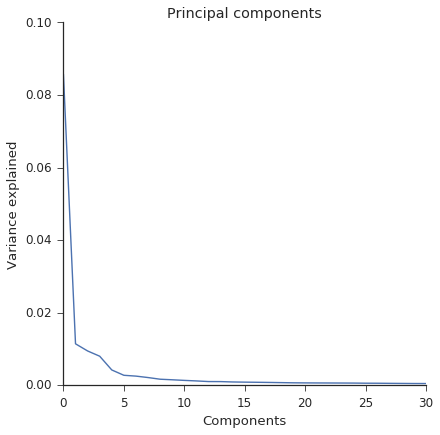

In [7]:
fig, ax = scdata.plot_pca_variance_explained(ylim=(0, 0.1), n_components=30)

In [8]:
NO_CMPNTS = 5
scdata.run_tsne(n_components=NO_CMPNTS, perplexity=30)

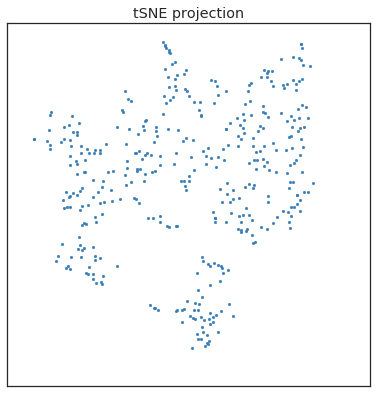

In [9]:
fig, ax = scdata.plot_tsne()

(<matplotlib.figure.Figure at 0x2b264c29fb38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b264c29fa90>)

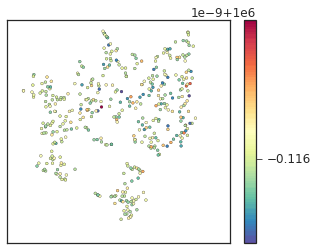

In [10]:
fig = plt.figure(figsize=[5, 4])
scdata.plot_tsne_by_cell_sizes(fig=fig)

In [11]:
scdata.run_diffusion_map()

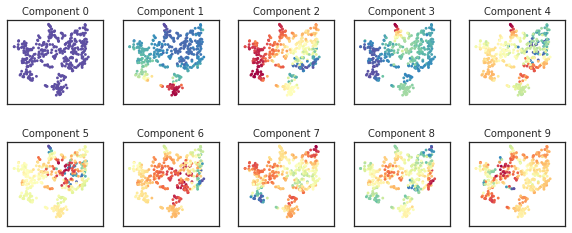

In [12]:
fig, ax = scdata.plot_diffusion_components()

In [13]:
scdata.run_diffusion_map_correlations()

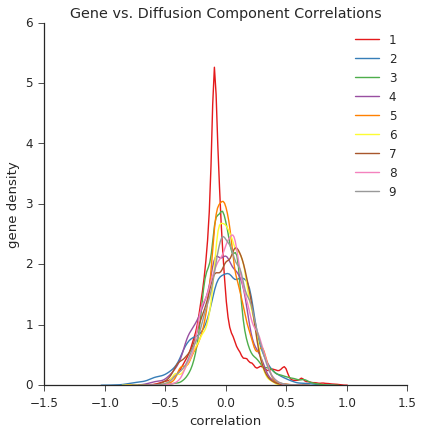

In [14]:
fig, ax = scdata.plot_gene_component_correlations()

In [15]:
scdata.data.columns = scdata.data.columns.str.upper()

In [16]:
scdata.run_gsea( output_stem= os.path.expanduser('~/.wishbone/gsea/mouse_marrow'))

Available GSEA .gmt files:

mouse:
gofat.bp.v1.0.gmt.txt
gofat.cc.v1.0.gmt.txt
gofat.mf.v1.0.gmt.txt

human:
c1.all.v5.0.symbols.gmt.txt
c2.all.v5.0.symbols.gmt.txt
c3.all.v5.0.symbols.gmt.txt
c5.all.v5.0.symbols.gmt.txt
c6.all.v5.0.symbols.gmt.txt
c7.all.v5.0.symbols.gmt.txt
gofat.bp.v1.0.gmt.txt
gofat.cc.v1.0.gmt.txt
gofat.mf.v1.0.gmt.txt
h.all.v5.0.symbols.gmt.txt

Please specify the gmt_file parameter as gmt_file=(organism, filename)


In [20]:
reports = scdata.run_gsea(output_stem= os.path.expanduser('~/.wishbone/gsea/mouse_marrow'), 
                    gmt_file=('mouse', 'gofat.bp.v1.0.gmt.txt'))

If running in notebook, please look at the command line window for GSEA progress log


In [21]:
!open ~/.wishbone/gsea/

Couldn't get a file descriptor referring to the console


In [22]:
# Component 1 enrichments
reports[1]['neg']

KeyError: 1

In [23]:
# Component 2 enrichments
reports[2]['pos']

KeyError: 2

In [24]:
scdata

SCData: 408 cells x 20037 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=True
diffusion_eigenvectors=True
diffusion_map_correlations=True
library_sizes=True
metadata=True
normalized=True
pca=True
tsne=True

In [17]:
# Wishbone class
wb = wishbone.wb.Wishbone(scdata)
wb.run_wishbone(start_cell='1771-026-187-E6', components_list=[1, 2], num_waypoints=150)

Building lNN graph...
lNN computed in : 0.00 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
......................................................................................................................................................
Time for determining distances and perspectives: 3.23 seconds
Determining branch point and branch associations...
Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9977
Iteration: 3
Correlation with previous iteration:  0.9982
Iteration: 4
Correlation with previous iteration:  0.9991
Iteration: 5
Correlation with previous iteration:  0.9997
Iteration: 6
Correlation with previous iteration:  0.9998
Iteration: 7
Correlation with previous iteration:  1.0000
6 realignment iterations


In [18]:
wb

Wishbone object: 408 cells x 20037 genes

branch=True
branch_colors=True
trajectory=True
waypoints=True

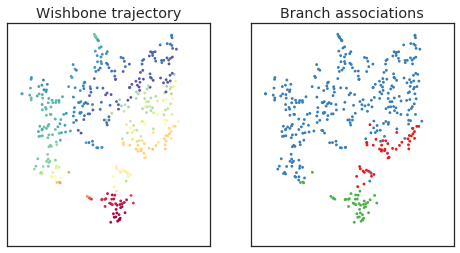

In [32]:
fig, ax = wb.plot_wishbone_on_tsne()
plt.savefig('wishbone/tracectory.pdf')

In [20]:
from matplotlib import cm

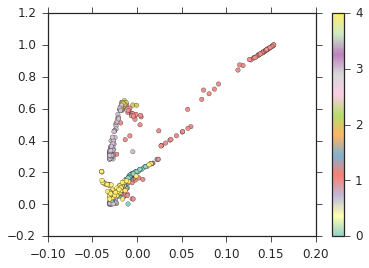

In [31]:
plt.scatter(scdata.diffusion_eigenvectors[1], wb.trajectory, c=info.loc[wb.branch.index]["day_int"], cmap=cm.Set3)
plt.colorbar(ticks=np.arange(np.min(info["day_int"]),np.max(info["day_int"])+1))
plt.savefig('wishbone/bifurcation.pdf')

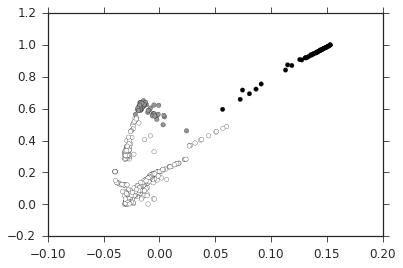

In [38]:
plt.scatter(scdata.diffusion_eigenvectors[1], wb.trajectory, c=wb.branch)
plt.savefig('wishbone/bifurcation_branches.pdf')

In [22]:
import pandas as pd

In [23]:
info = pd.read_csv('data/tcells_rebuttal.csv', index_col=0)

In [25]:
info.head()

,mapping_rate,reads,ERCC_content,MT_content,num_genes,pass_qc,day,cell_type,batch,bgplvm_2d_0,bgplvm_2d_1,pseudotime,assignment_prob_0,assignment_prob_1,branchtime,day_int,scaled_pseudotime
1771-026-187-A4,58.3133,3896411.0,685794.140253,59413.878238,1189,True,0,CD4+ T cell,026-187,1.066930,0.398297,-1.137538,0.500311,0.499689,0.72,0,0.061818
1771-026-187-B4,63.5948,1879316.0,281506.607105,78675.276820,2628,True,0,CD4+ T cell,026-187,-0.422201,1.077573,1.710693,0.756600,0.243400,0.72,0,0.840749
1771-026-187-B9,66.6844,3033191.0,703131.951030,64653.078928,1119,True,0,CD4+ T cell,026-187,1.167411,0.568630,-1.151186,0.501356,0.498644,0.72,0,0.058085
1771-026-187-C11,64.1202,5069762.0,664498.978177,68749.863388,1156,True,0,CD4+ T cell,026-187,1.218114,0.627906,-1.150485,0.501796,0.498204,0.72,0,0.058277
1771-026-187-D10,74.9924,4732249.0,699369.371218,65849.520846,943,True,0,CD4+ T cell,026-187,1.191595,0.220918,-1.032044,0.501757,0.498243,0.72,0,0.090668


In [3]:
tpm_file = 'data/lung/lung_tpm.csv'
data = pd.read_csv(tpm_file, index_col=0)
data = data.transpose()

In [4]:
data.head()

Ensembl Gene ID,(A)n,(AC)n,(AG)n,(AT)n,(C)n,(CAA)n,(CAAA)n,(CAAAA)n,(CAAAAA)n,(CCA)n,...,tRNA-Ser-TCA,tRNA-Ser-TCA_,tRNA-Ser-TCAm,tRNA-Ser-TCG,tRNA-Ser-TCY,tRNA-Thr-ACG_,tRNA-Thr-ACY_,tRNA-Tyr-TAC,tRNA-Tyr-TAT,tRNA-Val-GTA
SRP033209_AT2_rep_1_cell_20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.00000
SRP033209_E18.5_rep_1_cell_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.2246,0.0,0.0,94.9727,0.0,0.0,26.0857,385.919,0.0,5.63397
SRP033209_E18.5_rep_2_cell_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.00000
SRP033209_E18.5_rep_3_cell_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.00000
SRP033209_AT2_rep_1_cell_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.00000


In [5]:
scdata = wishbone.wb.SCData(data, 'sc-seq')

In [6]:
scdata

SCData: 198 cells x 48674 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=None
metadata=True
normalized=True
pca=None
tsne=None

In [7]:
scdata.run_pca()

In [8]:
scdata

SCData: 198 cells x 48674 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=None
metadata=True
normalized=True
pca=True
tsne=None

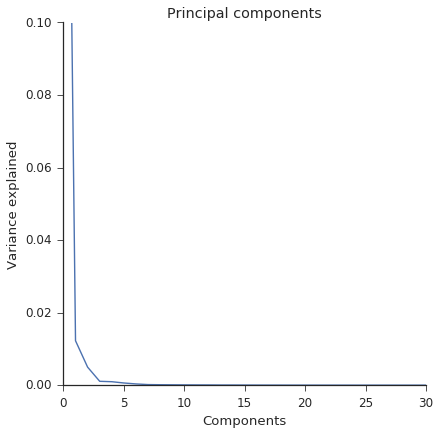

In [9]:
fig, ax = scdata.plot_pca_variance_explained(ylim=(0, 0.1), n_components=30)

In [11]:
out_dir = 'lung'
fig.savefig('wishbone/' + out_dir + '/prin_comp.png')

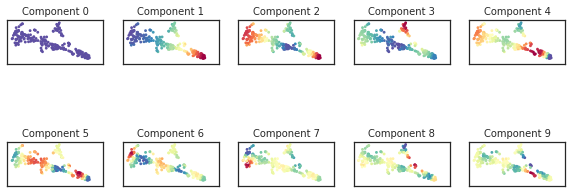

In [23]:
NO_CMPNTS = 5
scdata.run_tsne(n_components=NO_CMPNTS, perplexity=30)

scdata.run_diffusion_map()
  
fig, ax = scdata.plot_diffusion_components()
fig.savefig('wishbone/' + out_dir + '/diffusion_components.pdf',  figsize=(10, 7))

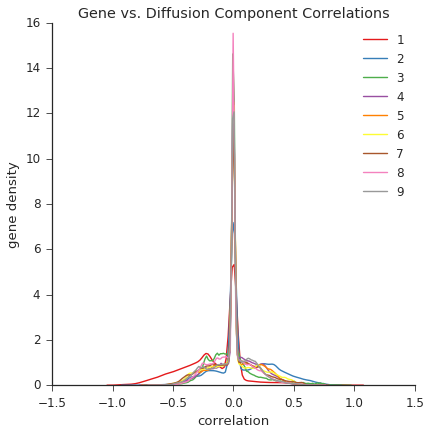

In [24]:
scdata.run_diffusion_map_correlations()
fig, ax = scdata.plot_gene_component_correlations()
fig.savefig('wishbone/' + out_dir + '/gene_components_correlation.pdf')

Building lNN graph...
lNN computed in : 0.00 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
......................................................................................................................................................
Time for determining distances and perspectives: 2.86 seconds
Determining branch point and branch associations...
Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9946
Iteration: 3
Correlation with previous iteration:  0.9992
Iteration: 4
Correlation with previous iteration:  0.9999
3 realignment iterations


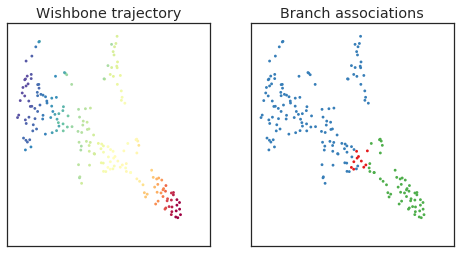

In [26]:
root_cell = 'SRP033209_E14.5_rep_1_cell_24'
wb = wishbone.wb.Wishbone(scdata)
wb.run_wishbone(start_cell= root_cell, components_list=[1, 2], num_waypoints=150)
  
fig, ax = wb.plot_wishbone_on_tsne()
fig.savefig('wishbone/' + out_dir + '/trajectory.pdf')

In [81]:
sample_file = 'data/lung/lung_sample_info.csv'
# sample annotation
info = pd.read_csv(sample_file, index_col=0)

In [28]:
info.head()

,condition
SRP033209_AT2_rep_1_cell_20,AT2
SRP033209_E18.5_rep_1_cell_1,E18.5
SRP033209_E18.5_rep_2_cell_17,E18.5
SRP033209_E18.5_rep_3_cell_17,E18.5
SRP033209_AT2_rep_1_cell_10,AT2


In [82]:
sample_column = 'condition'

In [83]:
info['color'] = sklearn.preprocessing.LabelEncoder().fit_transform(info[sample_column])

In [84]:
scdata.diffusion_eigenvectors[1].index.set_names(None, inplace=True)

In [91]:
tmp = info.join(pd.DataFrame(scdata.diffusion_eigenvectors[1]).rename(columns={1:'ev1'}).applymap(float)) \
          .join(pd.DataFrame(wb.trajectory, columns=['trajectory'])) \
          .join(pd.DataFrame(wb.branch, columns=['branch']))
tmp.head()

,condition,color,ev1,trajectory,branch
SRP033209_AT2_rep_1_cell_20,AT2,0,0.160439,0.999828,2
SRP033209_E18.5_rep_1_cell_1,E18.5,3,-0.011939,0.381524,1
SRP033209_E18.5_rep_2_cell_17,E18.5,3,-0.028659,0.354205,1
SRP033209_E18.5_rep_3_cell_17,E18.5,3,-0.045243,0.222177,1
SRP033209_AT2_rep_1_cell_10,AT2,0,0.112273,0.738521,2


In [112]:
def scatter(group):
    plt.plot(group['ev1'], group['trajectory'], label=group.name, marker='o', ls='none', )

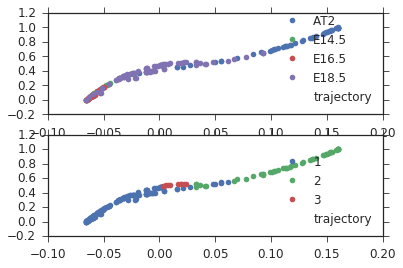

In [118]:
plt.subplot(2, 1, 1)
tmp.groupby('condition').apply(scatter)
plt.scatter(tmp['ev1'], tmp['trajectory'], alpha=0)
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
tmp.groupby('branch').apply(scatter)
plt.scatter(tmp['ev1'], tmp['trajectory'], alpha=0)
plt.legend(loc='lower right')

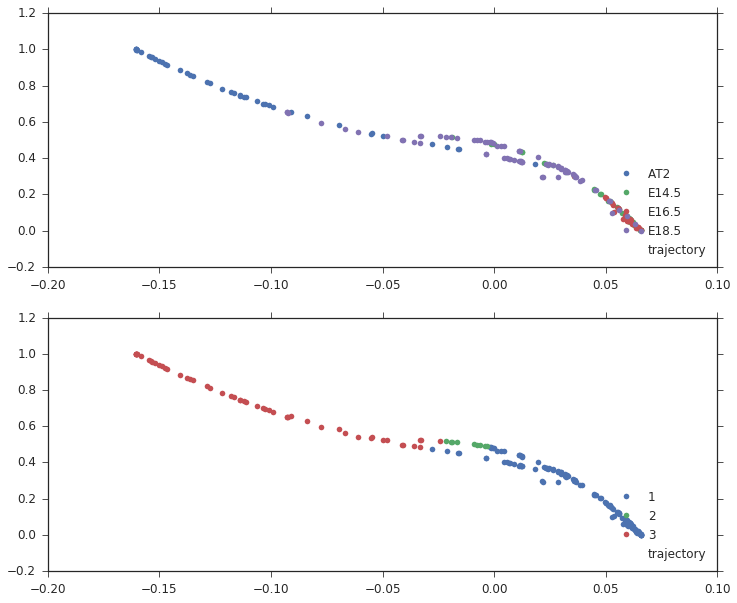

In [122]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2, 1, 1)
tmp.groupby(sample_column).apply(scatter)
plt.scatter(tmp['ev1'], tmp['trajectory'], alpha=0)
plt.legend(loc='lower right')

ax2 = fig.add_subplot(2, 1, 2)
tmp.groupby('branch').apply(scatter)
plt.scatter(tmp['ev1'], tmp['trajectory'], alpha=0)
plt.legend(loc='lower right')
  

In [161]:
tpm_file = 'data/frog/frog_tpm.csv'
sample_file = 'data/frog/frog_sample_info.csv'
sample_column = 'hpf'
root_cell = 'SRR1795679'
out_dir = 'wishbone/frog'


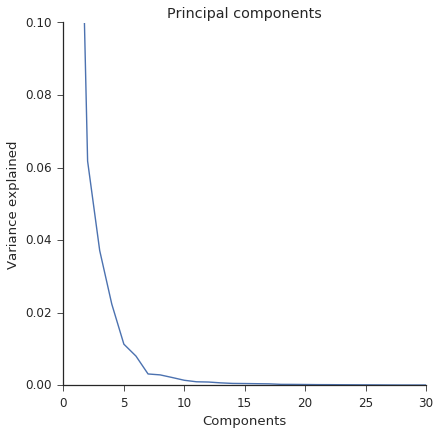

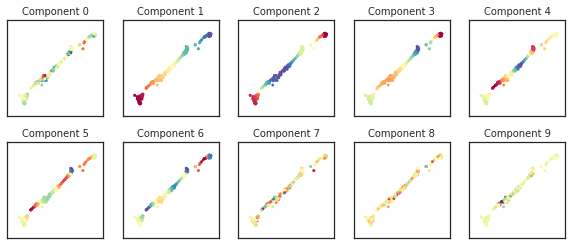

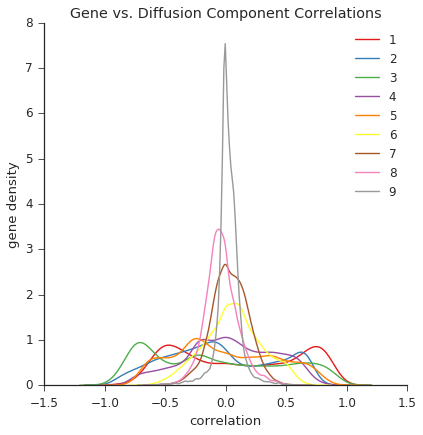

In [167]:
# load data
data = pd.read_csv(tpm_file, index_col=0)

# remove NA's column-wise
data = data.dropna(axis=1)

### exclude ERCC and rescale
cond = data.index.str.contains('ERCC')
data = data.drop(data[cond].index.values)

rescale = data.sum(axis = 0)
data = data / rescale * 1e6

data = data.transpose()

# generate scData class
scdata = wishbone.wb.SCData(data, 'sc-seq')
scdata.run_pca()

fig, ax = scdata.plot_pca_variance_explained(ylim=(0, 0.1), n_components=30)
fig.savefig(out_dir + '/prin_comp.pdf')


NO_CMPNTS = 8
scdata.run_tsne(n_components=NO_CMPNTS, perplexity=30)

scdata.run_diffusion_map()

fig, ax = scdata.plot_diffusion_components()
fig.savefig(out_dir + '/diffusion_components.pdf', figsize=(10, 7))

scdata.run_diffusion_map_correlations()
fig, ax = scdata.plot_gene_component_correlations()
fig.savefig(out_dir + '/gene_components_correlation.pdf')
  

In [175]:
# run wishbone
wb = wishbone.wb.Wishbone(scdata)

In [177]:
wb.scdata.data.index.str.contains(root_cell)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [179]:
wb.run_wishbone(start_cell= root_cell, components_list=[1, 2], num_waypoints=100, k=50)

Building lNN graph...
lNN computed in : 0.00 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
....................................................................................................
Time for determining distances and perspectives: 3.34 seconds
Determining branch point and branch associations...
Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9770
Iteration: 3
Correlation with previous iteration:  0.9911
Iteration: 4
Correlation with previous iteration:  0.9998
Iteration: 5
Correlation with previous iteration:  1.0000
4 realignment iterations


In [184]:
if (tpm_file.find('frog') >= 0) :
    wb.run_wishbone(start_cell= root_cell, components_list=[1, 2], num_waypoints=100, k=50)
else :
    wb.run_wishbone(start_cell= root_cell, components_list=[1, 2], num_waypoints=100)

True
